In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor, export_text, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error,  r2_score, mean_squared_log_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error,  r2_score
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings('ignore')

In [68]:
df = pd.read_csv('final_df_2.csv')
df.head()

,Unnamed: 0,price,year,cylinders,odometer,age,posted_ago_in_months,positive_words,negative_words,region_austin,...,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy,sentiment_Positive
0,0,33590,2014,8,57923,9,30,18.0,5.0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,22590,2010,8,71229,13,30,18.0,5.0,0,...,0,0,0,0,0,0,0,0,0,1
2,2,39590,2020,8,19160,3,30,18.0,5.0,0,...,0,0,0,0,0,0,0,0,0,1
3,3,30990,2017,8,41124,6,30,17.0,8.0,0,...,0,0,0,0,0,0,0,0,0,1
4,4,15000,2013,6,128000,10,30,1.0,0.0,0,...,0,0,0,0,0,0,0,0,0,1


In [69]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [70]:
df['positive_words'].fillna(0, inplace=True)
df['negative_words'].fillna(0, inplace=True)

In [71]:
df.head()

,price,year,cylinders,odometer,age,posted_ago_in_months,positive_words,negative_words,region_austin,region_baltimore,...,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy,sentiment_Positive
0,33590,2014,8,57923,9,30,18.0,5.0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,22590,2010,8,71229,13,30,18.0,5.0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,39590,2020,8,19160,3,30,18.0,5.0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,30990,2017,8,41124,6,30,17.0,8.0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,15000,2013,6,128000,10,30,1.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [72]:
df.shape

(101152, 228)

In [73]:
X = df.drop('price',axis=1)
y = df['price']
X_log_transformed = np.log1p(X)

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X_log_transformed)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [74]:
scaled_X

array([[ 8.64921041e-02,  1.18127457e+00, -1.62866904e-02, ...,
        -2.03810986e-02, -1.96394267e-02,  7.17413632e-01],
       [-8.32383633e-01,  1.18127457e+00,  1.30473621e-01, ...,
        -2.03810986e-02, -1.96394267e-02,  7.17413632e-01],
       [ 1.46139122e+00,  1.18127457e+00, -8.01432842e-01, ...,
        -2.03810986e-02, -1.96394267e-02,  7.17413632e-01],
       ...,
       [-1.75308889e+00,  9.13776262e-01,  7.21656138e-01, ...,
        -2.03810986e-02,  5.09179833e+01, -1.39389601e+00],
       [-1.98355192e+00,  5.55636237e-01,  8.07876764e-01, ...,
        -2.03810986e-02,  5.09179833e+01, -1.39389601e+00],
       [-2.21412987e+00,  1.18127457e+00,  8.11702810e-01, ...,
        -2.03810986e-02,  5.09179833e+01, -1.39389601e+00]])

#### Method for Displaying metrics

In [75]:
def result(y_test, y_pred):
    r=[]
    r.append('%.4f' % r2_score(y_test,y_pred))
    r.append('%.4f' % (r2_score(y_test,y_pred)*100))
    r.append('%.2f' % mean_squared_error(y_test, y_pred))
    r.append('%.2f' % mean_absolute_error(y_test, y_pred))
    r.append('%.2f' % np.sqrt(mean_squared_error(y_test, y_pred)))
    
    return (r)

def printResults(y_test, y_pred):
    score_lr = result(y_test, y_pred)
    print('R2_score: ', score_lr[0])
    print('Mean squared error: ', score_lr[2])
    print('Mean absolute error: ', score_lr[3])
    print('Root mean squared error: ', score_lr[4])

def plotScatterPlotOfActualVsPredicted(y_test, y_pred, modelName):
    # Create a scatter plot
    plt.figure(figsize=(8, 6))  # Set the figure size (optional)
    plt.scatter(y_test, y_pred, color='blue', alpha=0.7)  # Scatter plot

    # Add labels and a diagonal line for reference
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

    # Set plot title and show the plot
    plt.title(f'Scatter Plot of Actual vs. Predicted Values\n{modelName}')
    plt.show()

In [76]:
metrics_df = pd.DataFrame(index=['R2 Score', 'Accuracy(%)', 'Mean Squared Error', 'Mean Absolute Error', 'Root MSE'])

## Linear Regression

In [77]:
lrModel = LinearRegression()
lrModel.fit(X_train, y_train)
y_pred = lrModel.predict(X_test)

In [78]:
printResults(y_test, y_pred)

R2_score:  0.4327
Mean squared error:  89618214.65
Mean absolute error:  6706.73
Root mean squared error:  9466.69


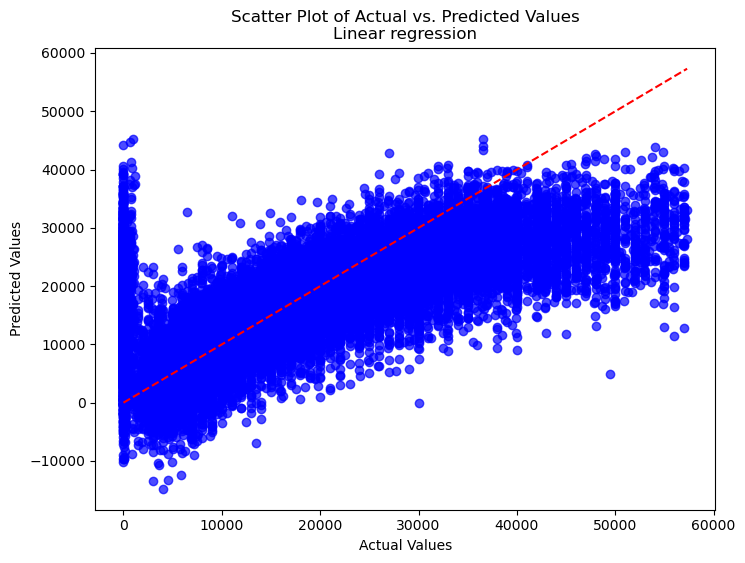

In [79]:
plotScatterPlotOfActualVsPredicted(y_test, y_pred, "Linear regression")

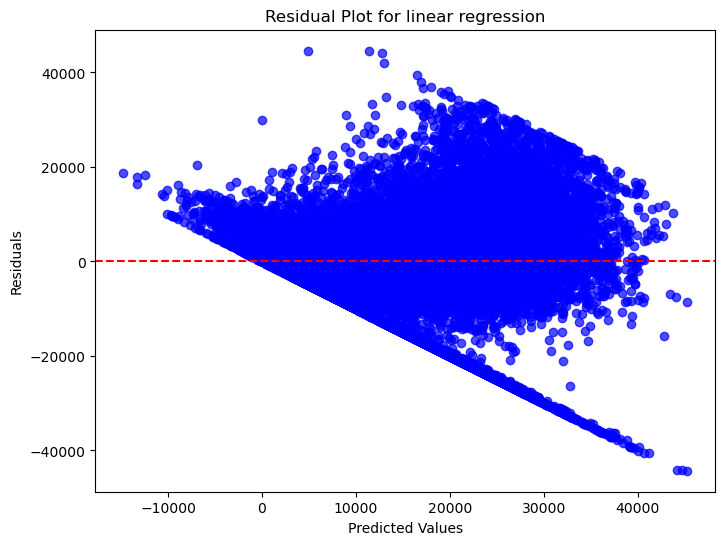

In [80]:
# Calculate the residuals (actual - predicted)
residuals = [true - pred for true, pred in zip(y_test, y_pred)]

# Create a residual plot
plt.figure(figsize=(8, 6))  # Set the figure size (optional)
plt.scatter(y_pred, residuals, color='blue', alpha=0.7)  # Scatter plot

# Add a horizontal line at y=0 for reference
plt.axhline(y=0, color='red', linestyle='--')

# Add labels and title
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for linear regression')

# Show or save the plot
plt.show()

## Ridge Regression

In [81]:
#Ridge Regression
RR = Ridge(alpha=20.336, solver='auto')
RR.fit(X_train, y_train)
y_pred = RR.predict(X_test)

In [82]:
score_rr = result(y_test, y_pred)
metrics_df['Ridge Regression'] = score_rr
print('R2 score: ', score_rr[0])
print('Mean squared error: ', score_rr[2])
print('Mean absolute error: ', score_rr[3])
print('Root mean squared error: ', score_rr[4])

R2 score:  0.4313
Mean squared error:  89846928.49
Mean absolute error:  6713.10
Root mean squared error:  9478.76


### Visualization for Ridge Regression

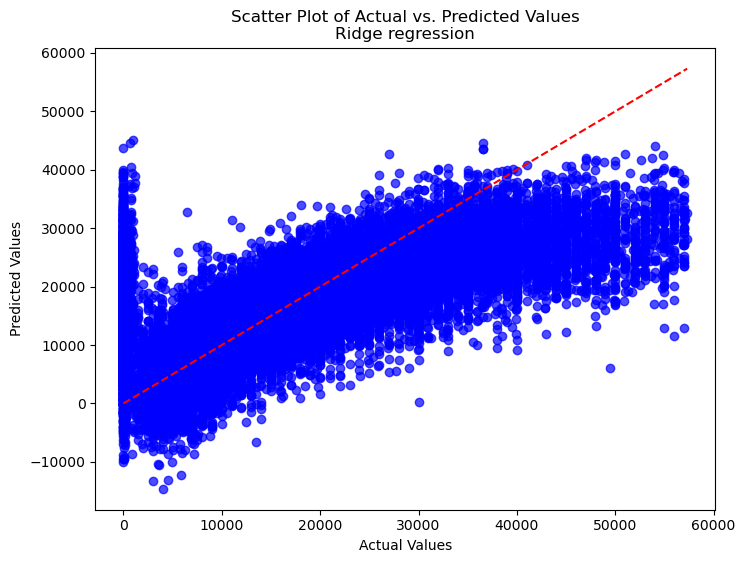

In [83]:
def plotScatterPlotOfActualVsPredicted(y_test, y_pred, modelName):
    # Create a scatter plot
    plt.figure(figsize=(8, 6))  # Set the figure size (optional)
    plt.scatter(y_test, y_pred, color='blue', alpha=0.7)  # Scatter plot

    # Add labels and a diagonal line for reference
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

    # Set plot title and show the plot
    plt.title(f'Scatter Plot of Actual vs. Predicted Values\n{modelName}')
    plt.show()
plotScatterPlotOfActualVsPredicted(y_test, y_pred, "Ridge regression")

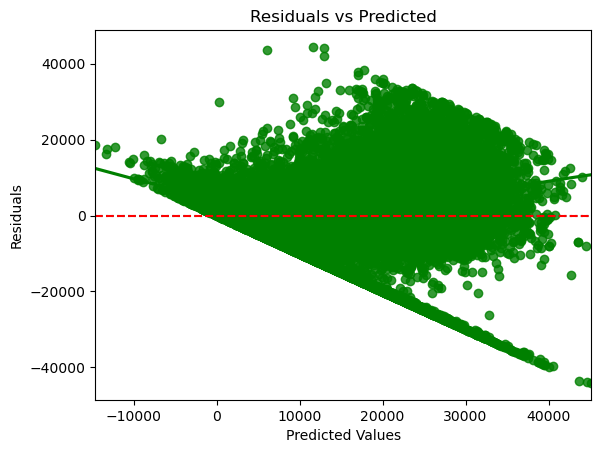

In [84]:
# Assuming `y_test` are your actual values and `y_pred` are your predicted values
residuals = y_test - y_pred

sns.residplot(x=y_pred, y=residuals, lowess=True, color="g")
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


### Lasso Regression

In [85]:
#Lasso Regression
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)

In [86]:
score_lasso = result(y_test, y_pred)
metrics_df['Lasso Regression'] = score_lasso
print('R2 score: ', score_lasso[0])
print('Mean squared error: ', score_lasso[2])
print('Mean absolute error: ', score_lasso[3])
print('Root mean squared error: ', score_lasso[4])

R2 score:  0.4327
Mean squared error:  89619183.45
Mean absolute error:  6706.75
Root mean squared error:  9466.74


[('year', 1207.4468368895562), ('cylinders', 48.72215530316381), ('odometer', -0.03893605880689543), ('age', 327.13804922111456), ('posted_ago_in_months', -126.14200499900072), ('positive_words', 4.821710677722039), ('negative_words', -45.99749767096989), ('region_austin', 6173.720066642753), ('region_baltimore', 12889.016609165294), ('region_bend', 8480.846851646182), ('region_boise', 5035.792230577208), ('region_boston', 4276.306630976647), ('region_chicago', 4484.851260448688), ('region_cleveland', 6635.719284172308), ('region_colorado springs', 5020.413396241246), ('region_columbus', 5773.917412970088), ('region_denver', 8746.317507625352), ('region_des moines', 6245.6448100022635), ('region_detroit metro', 3835.6815908314143), ('region_eugene', 7850.194301228962), ('region_fresno / madera', 7470.716010212055), ('region_grand rapids', 9512.784203081697), ('region_houston', 2735.963607877488), ('region_jacksonville', 6066.802116224893), ('region_kansas city, mo', 7956.637432554894),

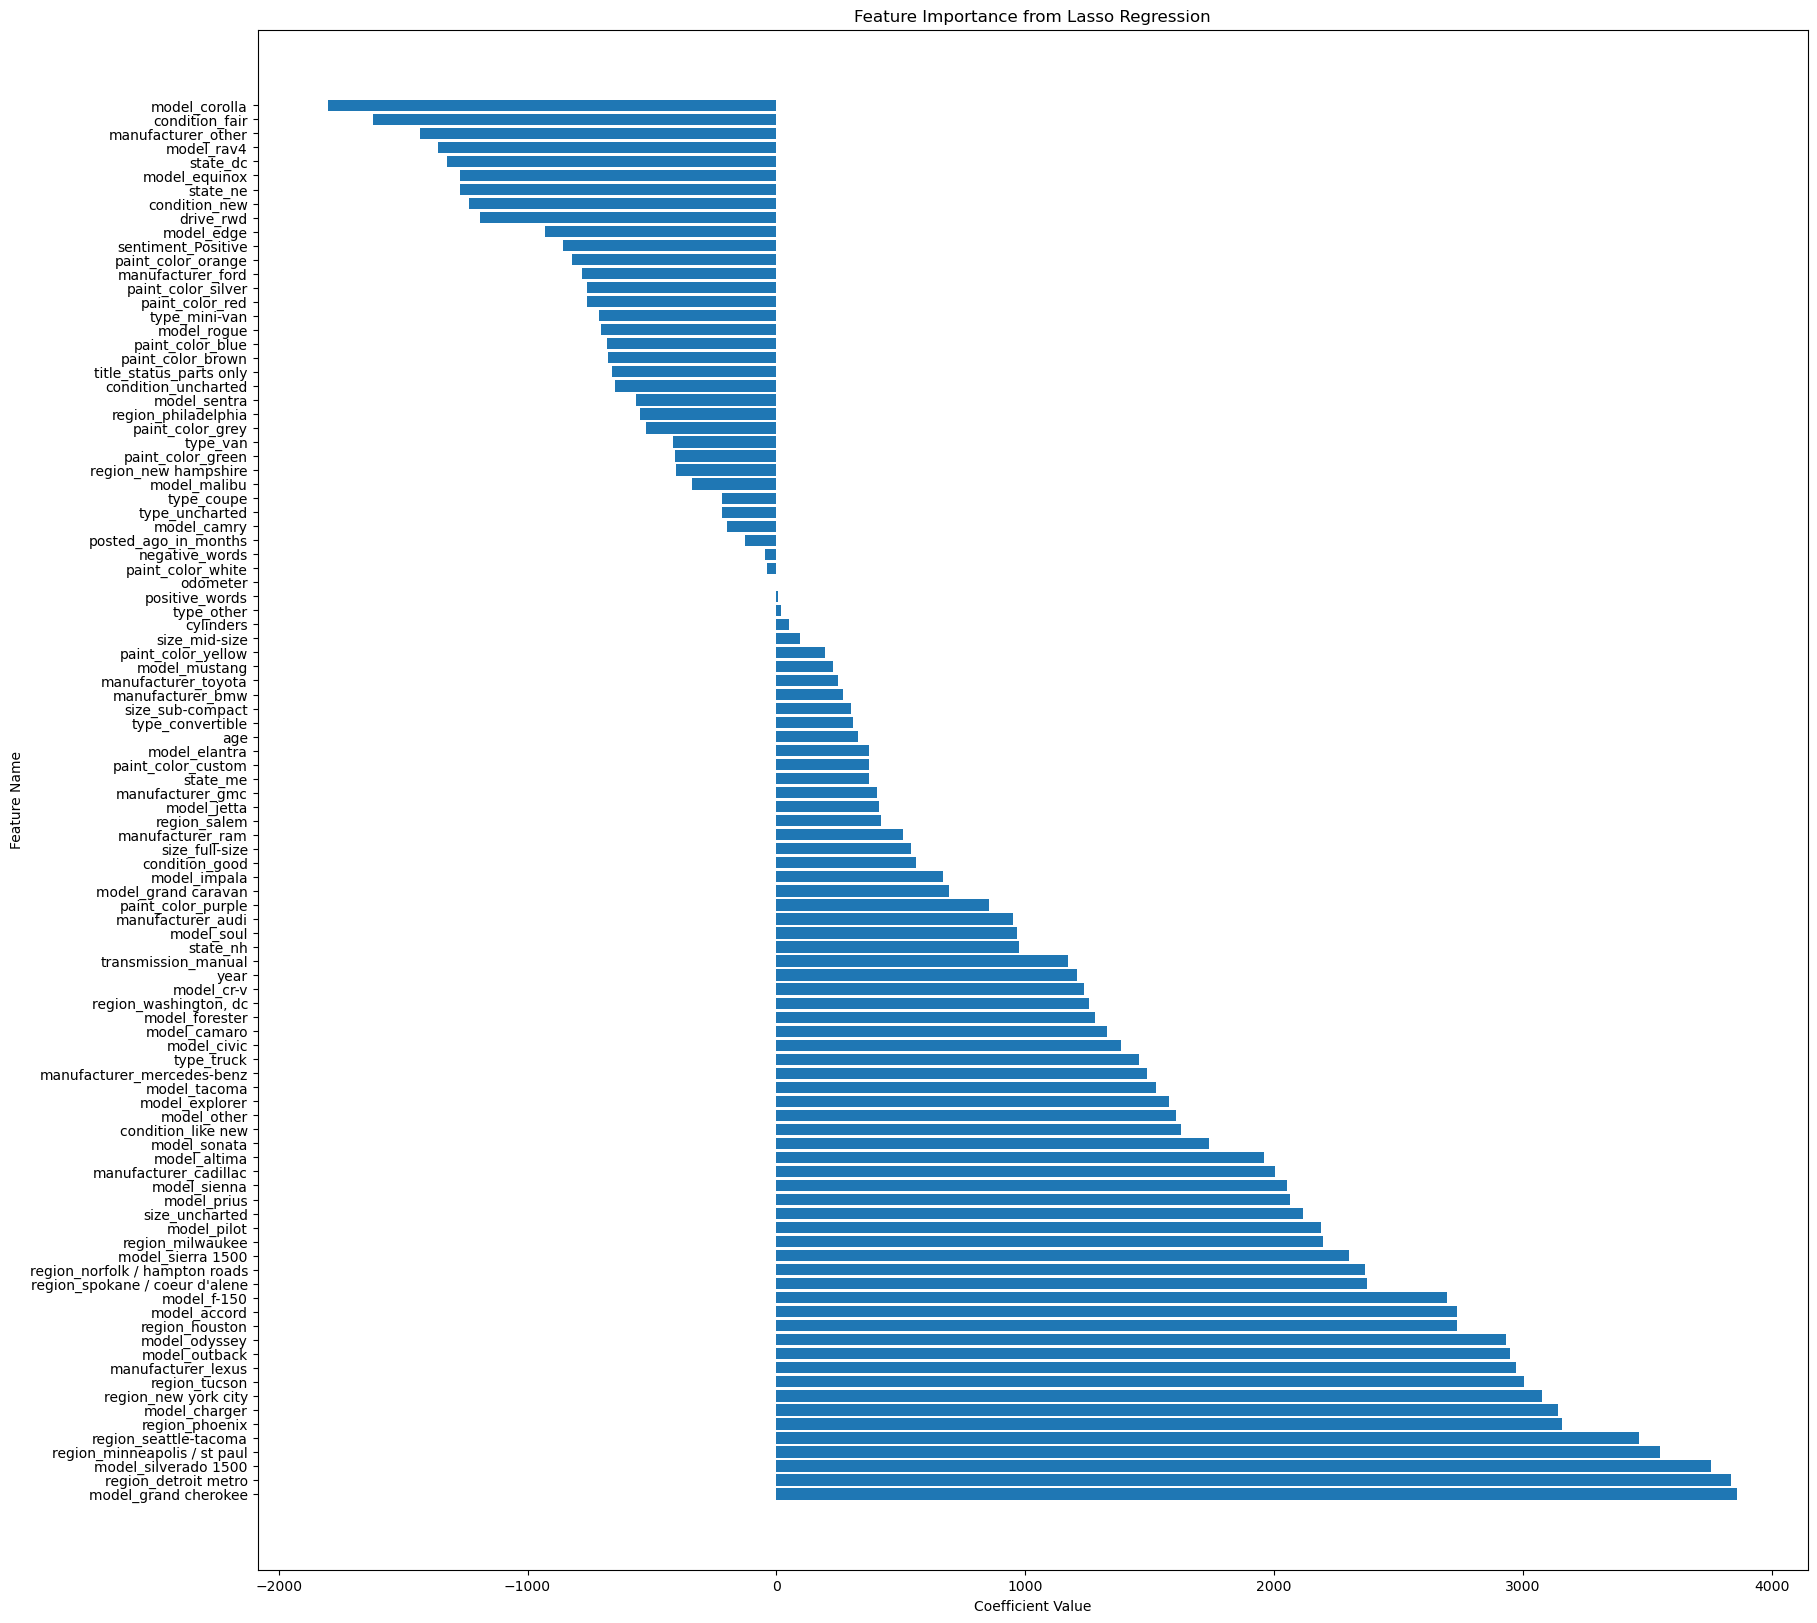

In [87]:
# Retrieve the coefficients from the model
coefficients = lasso.coef_
# If you want to get the feature names and assuming you have a pandas DataFrame
feature_names = X_train.columns.tolist()
# Now you can print the coefficients along with their corresponding feature names
print(list(zip(feature_names, coefficients)))

feature_importance = sorted(zip(coefficients, feature_names), reverse=True)
# Separate the coefficients and names
values, names = zip(*feature_importance)

# Create the plot
plt.figure(figsize=(20, 20))
plt.barh(names[50:150], values[50:150])
plt.xlabel('Coefficient Value')
plt.ylabel('Feature Name')
plt.title('Feature Importance from Lasso Regression')
plt.show()

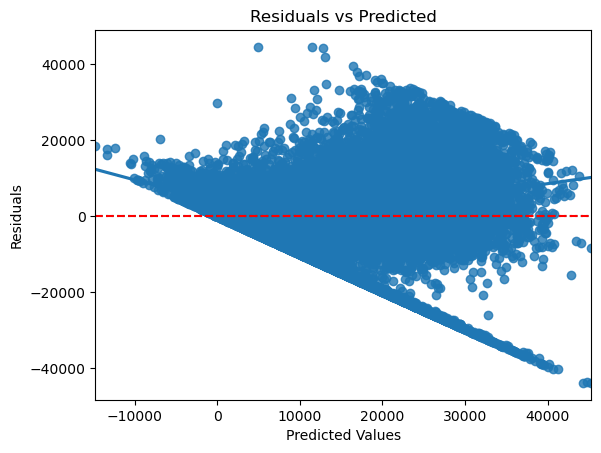

In [88]:
# Assuming you have `y_test` as your actual test values and `y_pred` as your predicted values:
residuals = y_test - y_pred

# Using seaborn to create a residual plot
sns.residplot(x=y_pred, y=residuals, lowess=True)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

In [89]:
def plotScatterPlotOfActualVsPredicted(y_test, y_pred, modelName):
    # Create a scatter plot
    plt.figure(figsize=(8, 6))  # Set the figure size (optional)
    plt.scatter(y_test, y_pred, color='blue', alpha=0.7)  # Scatter plot

    # Add labels and a diagonal line for reference
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

    # Set plot title and show the plot
    plt.title(f'Scatter Plot of Actual vs. Predicted Values\n{modelName}')
    plt.show()

## K Nearest Neighbors

In [90]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = .3)

In [91]:
KNN = KNeighborsRegressor(n_neighbors=5) 
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)

In [92]:
printResults(y_test, y_pred)

R2_score:  0.3850
Mean squared error:  97155353.82
Mean absolute error:  7061.75
Root mean squared error:  9856.74


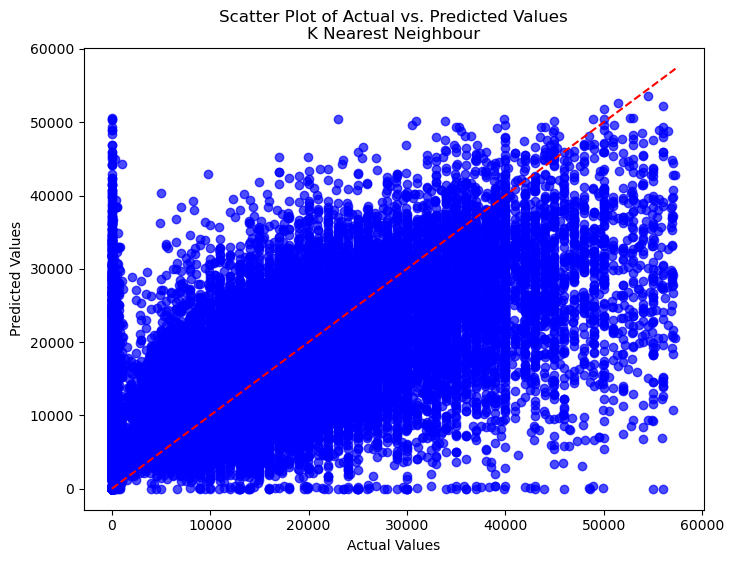

In [93]:
plotScatterPlotOfActualVsPredicted(y_test, y_pred, "K Nearest Neighbour")

K= 1
K= 2
K= 3
K= 4
K= 5


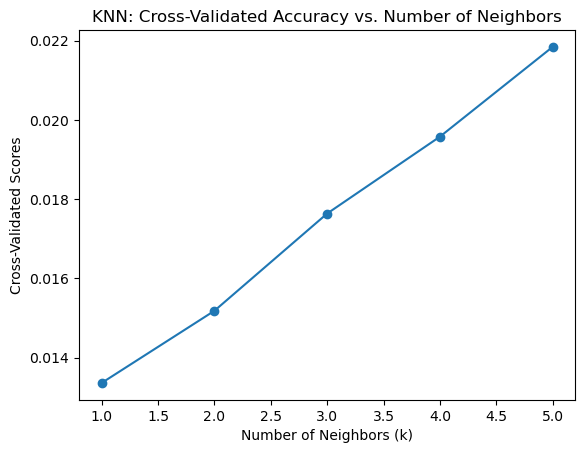

In [94]:
# Range of k values to test
k_values = np.arange(1, 6)

# Perform k-fold cross-validation for each k
cv_scores = []
for k in k_values:
    print('K=',k)
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')  # Adjust scoring metric as needed
    cv_scores.append(scores.mean())

# Plot the results
plt.plot(k_values, cv_scores, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validated Scores')
plt.title('KNN: Cross-Validated Accuracy vs. Number of Neighbors')
plt.show()

## Decision Tree Regression

In [95]:
decisionTreeModel = DecisionTreeRegressor()
decisionTreeModel.fit(X_train, y_train)
y_pred = decisionTreeModel.predict(X_test)

In [96]:
printResults(y_test, y_pred)

R2_score:  0.2773
Mean squared error:  114171075.91
Mean absolute error:  6470.37
Root mean squared error:  10685.09


#### Visualizing plots for Decision Tree

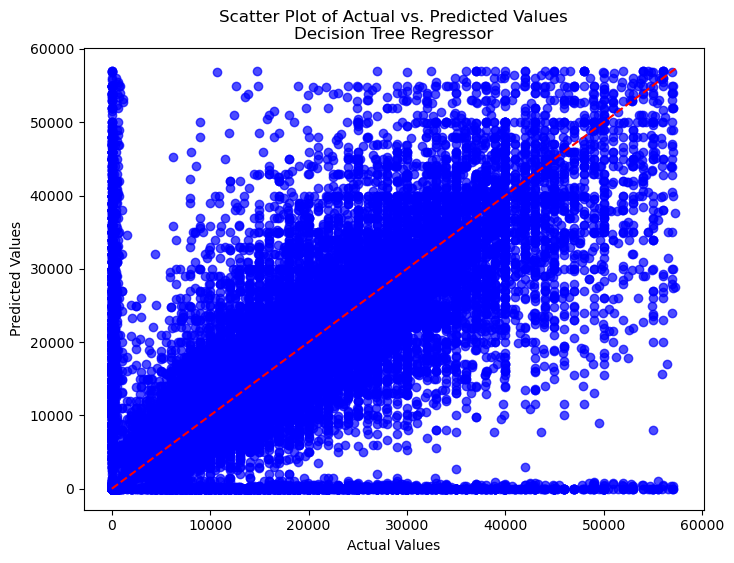

In [97]:
plotScatterPlotOfActualVsPredicted(y_test, y_pred, "Decision Tree Regressor")

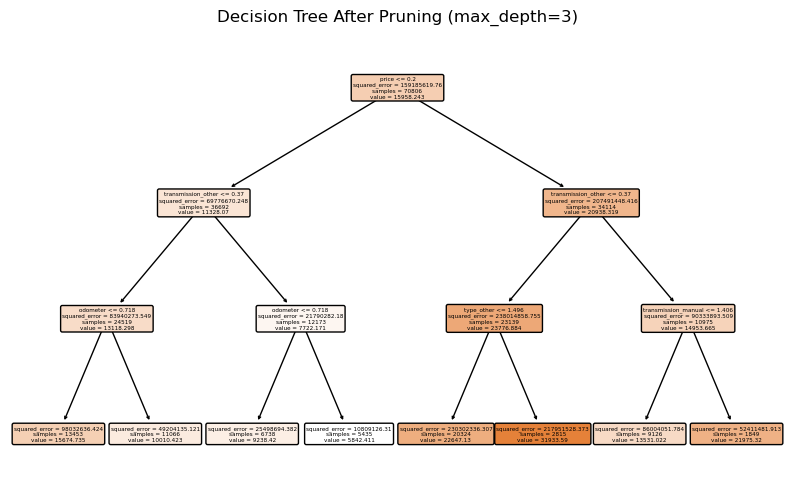

In [100]:
# Create and train a decision tree regressor with pruning (e.g., max_depth)
pruned_regressor = DecisionTreeRegressor(max_depth=3)
pruned_regressor.fit(X_train, y_train)

# Visualize the pruned tree structure
plt.figure(figsize=(10, 6))
plot_tree(pruned_regressor, filled=True, feature_names=list(df.columns), rounded=True)
plt.title('Decision Tree After Pruning (max_depth=3)')
plt.show()

## Random Forest Regression

In [101]:
X_log_transformed = np.log1p(X)

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X_log_transformed)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [102]:
rf_reg = RandomForestRegressor(n_estimators=150,random_state=0, min_samples_leaf=1, max_features=0.3, n_jobs=-1, oob_score=True)
rf_reg.fit(X_train, y_train)
y_pred = rf_reg.predict(X_test)

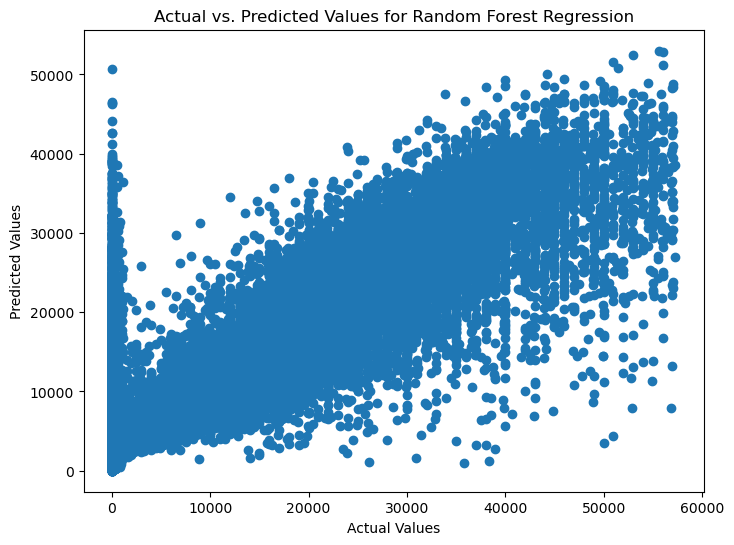

In [103]:
# predicted_values = rf_reg.predict(X_test)  # X_test contains your test data
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values for Random Forest Regression")
plt.show()

### Visualizing plots for Random Forest

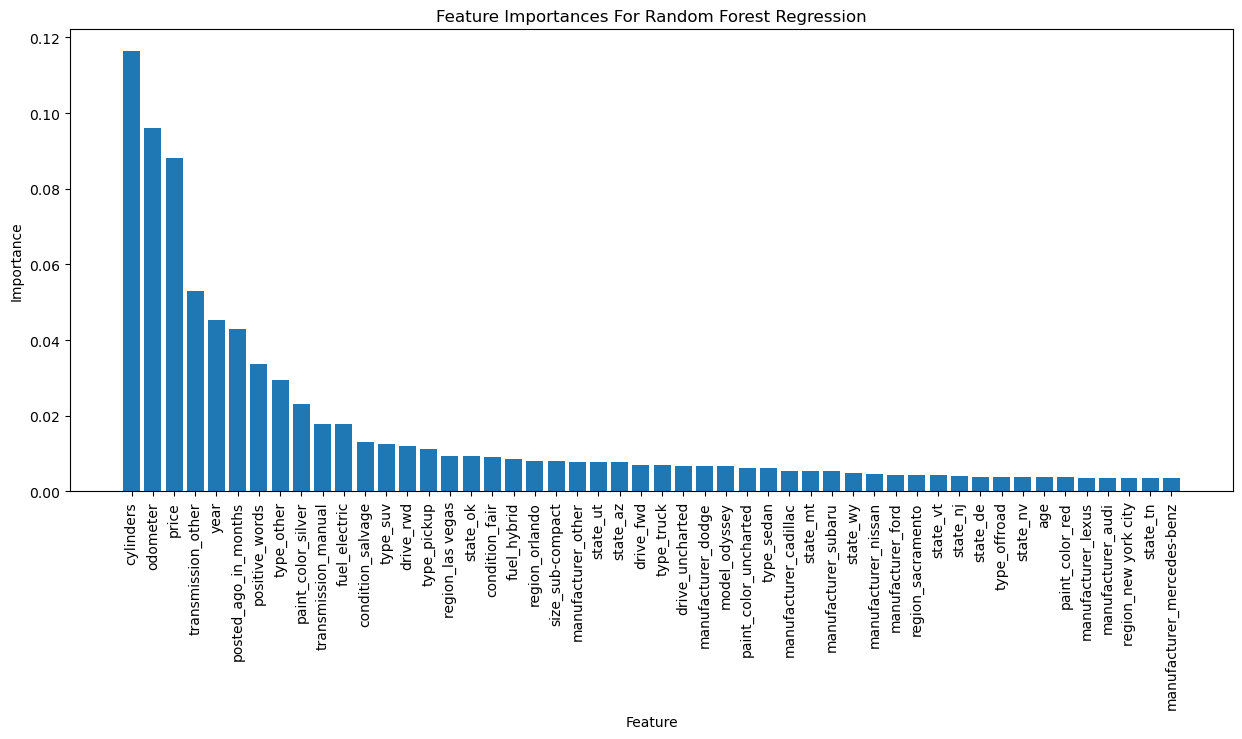

In [105]:
importances = rf_reg.feature_importances_
features = df.columns  # Replace this with the actual feature names
indices = np.argsort(importances)[::-1][:50]

plt.figure(figsize=(15, 6))
plt.title("Feature Importances For Random Forest Regression")
plt.bar(range(len(features[:50])), importances[indices], align="center")
plt.xticks(range(len(features[:50])), [features[i] for i in indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

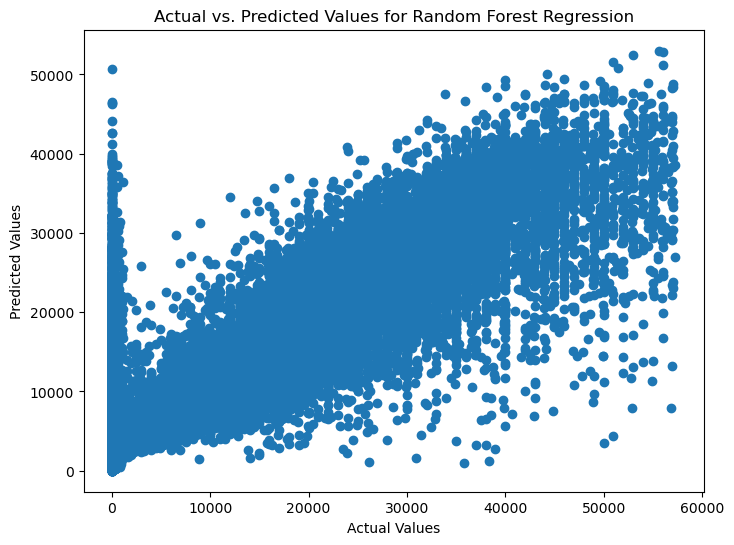

In [106]:
# predicted_values = rf_reg.predict(X_test)  # X_test contains your test data
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values for Random Forest Regression")
plt.show()

### Comparing models metrics

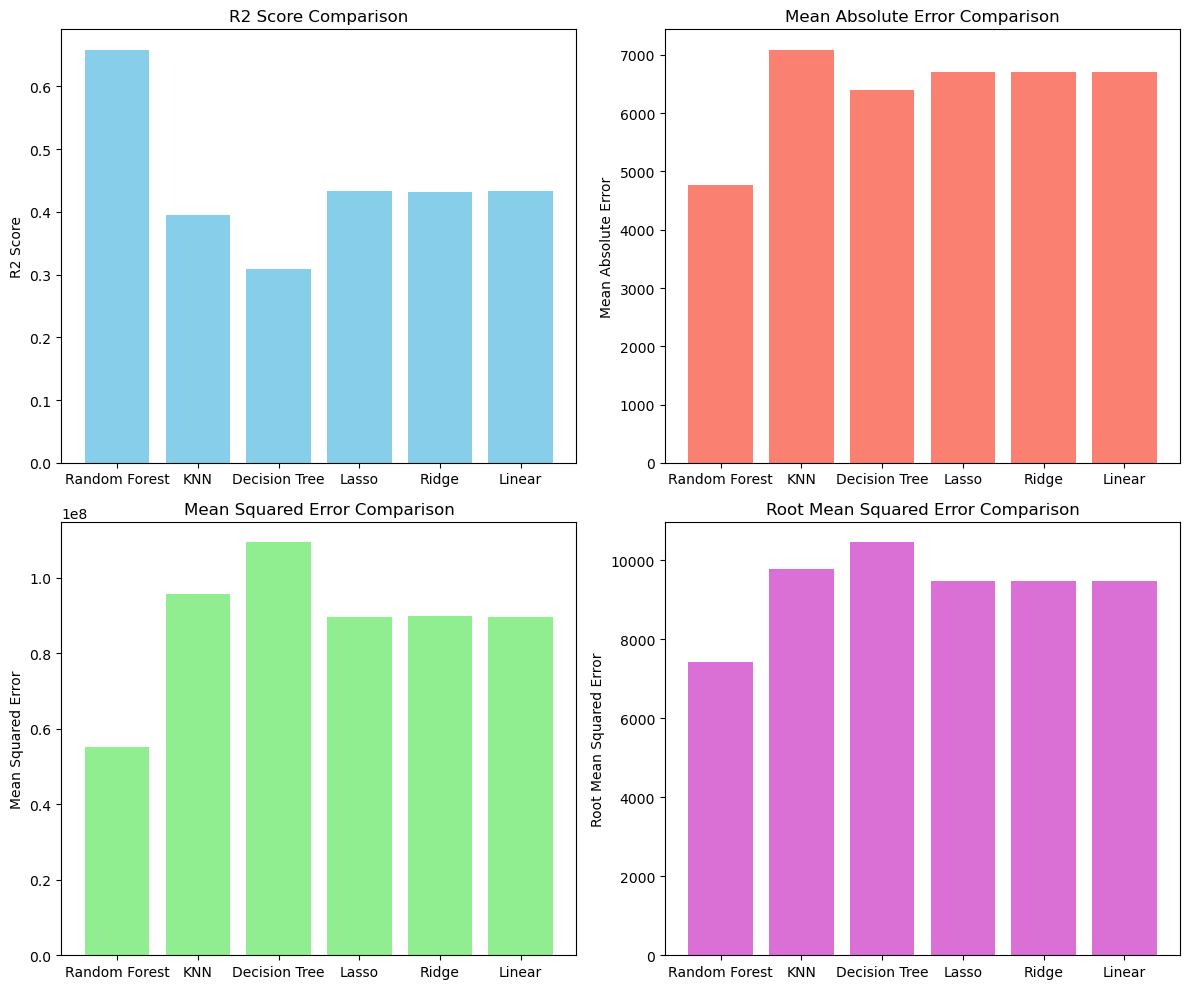

In [108]:
models = ['Random Forest', 'KNN', 'Decision Tree', 'Lasso', 'Ridge', 'Linear']
# Hardcoded values based on our initial results
r2_scores = [0.658, 0.3951, 0.3083, 0.4327, 0.4319, 0.4327]
mae = [4768.08, 7085.96, 6402.73, 6706.70, 6709.35, 6706.76]  # Mean Absolute Error
mse = [55160878.59, 95564661.71, 109275909.36, 89622337.84, 89744847.83, 89620773.13]  # Mean Squared Error
rmse = [7427.04, 9775.72, 10453.51, 9466.91, 9473.38, 9466.82]  # Root Mean Squared Error

# Setting the positions for the bars
pos = np.arange(len(models))

# Creating the subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plotting R2 Score
axs[0, 0].bar(pos, r2_scores, color='skyblue')
axs[0, 0].set_title('R2 Score Comparison')
axs[0, 0].set_xticks(pos)
axs[0, 0].set_xticklabels(models)
axs[0, 0].set_ylabel('R2 Score')

# Plotting Mean Absolute Error
axs[0, 1].bar(pos, mae, color='salmon')
axs[0, 1].set_title('Mean Absolute Error Comparison')
axs[0, 1].set_xticks(pos)
axs[0, 1].set_xticklabels(models)
axs[0, 1].set_ylabel('Mean Absolute Error')

# Plotting Mean Squared Error
axs[1, 0].bar(pos, mse, color='lightgreen')
axs[1, 0].set_title('Mean Squared Error Comparison')
axs[1, 0].set_xticks(pos)
axs[1, 0].set_xticklabels(models)
axs[1, 0].set_ylabel('Mean Squared Error')

# Plotting Root Mean Squared Error
axs[1, 1].bar(pos, rmse, color='orchid')
axs[1, 1].set_title('Root Mean Squared Error Comparison')
axs[1, 1].set_xticks(pos)
axs[1, 1].set_xticklabels(models)
axs[1, 1].set_ylabel('Root Mean Squared Error')

# Adjusting layout
plt.tight_layout()

plt.show()
